# Audio Augmentation functions for generating more Data

The functions that are used to generate more audio data will be shown and explained in the following. 
You can find the implementation in the "create_augmented_samples.py".


In [35]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
import scipy.io.wavfile
from IPython.display import Audio

In [10]:
path_sample_1="./audio_samples/sample1.wav"
#path_sample_2="./audio_samples/sample2.wav"
#path_sample_3="./audio_samples/sample3.wav"
Audio(path_sample_1)

In [14]:
sample_rate,samples = scipy.io.wavfile.read("./audio_samples/sample1.wav")
np.array([samples]).shape


/home/julian/.local/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


(1, 405948)

In [15]:
def plot_time_series(data):
        fig = plt.figure(figsize=(14, 8))
        plt.title('Raw wave ')
        plt.ylabel('Amplitude')
        plt.plot(np.linspace(0, 1, len(data)), data)
        plt.show()

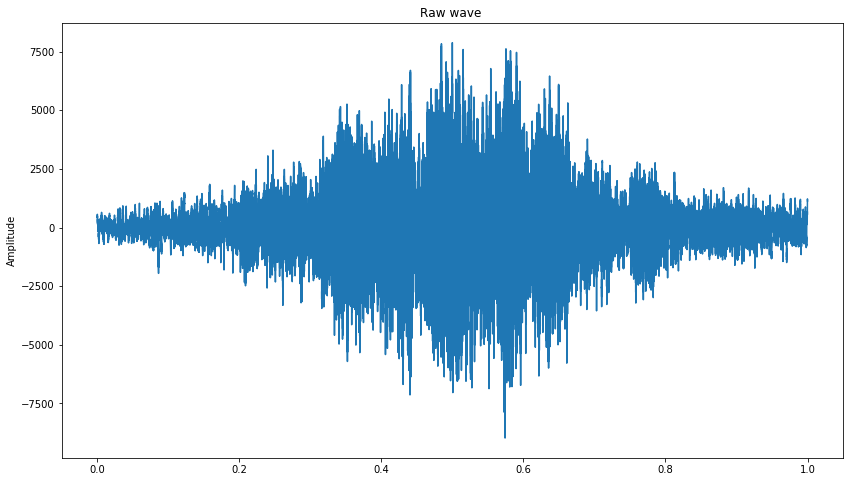

In [6]:
plot_time_series(samples)

# change speed

In [16]:
y_speed = samples.copy()
speed_change = np.random.uniform(low=0.9,high=1.1)
print("speed_change = ",speed_change)
tmp = librosa.effects.time_stretch(y_speed.astype('float64'), speed_change)
minlen = min(y_speed.shape[0], tmp.shape[0])
y_speed *= 0 
y_speed[0:minlen] = tmp[0:minlen]
Audio(y_speed, rate=sample_rate)


speed_change =  1.0395034073252802


# value augmentation

In [21]:
y_aug = samples.copy()
dyn_change = np.random.uniform(low=1.5,high=3)
print("dyn_change = ",dyn_change)
y_aug = y_aug * dyn_change
print(y_aug[:50])
print(samples[:50])
Audio(y_aug, rate=sample_rate)

dyn_change =  2.999950200127045
[1553.97420367 1592.97355627 1640.97275947 1661.97241087 1673.97221167
 1688.97196267 1682.97206227 1658.97246067 1628.97295867 1592.97355627
 1550.97425347 1541.97440287 1544.97435307 1532.97455226 1532.97455226
 1526.97465186 1460.97574746 1400.97674346 1355.97749046 1313.97818766
 1304.97833706 1283.97868565 1250.97923345 1223.97968165 1202.98003025
 1193.98017965 1196.98012985 1196.98012985 1214.97983105 1205.97998045
 1229.97958205 1289.97858605 1319.97808806 1328.97793866 1322.97803826
 1346.97763986 1337.97778926 1298.97843666 1298.97843666 1307.97828726
 1277.97878525 1241.97938285 1226.97963185 1259.97908405 1292.97853625
 1337.97778926 1388.97694266 1466.97564786 1538.97445267 1556.97415387]
[518 531 547 554 558 563 561 553 543 531 517 514 515 511 511 509 487 467
 452 438 435 428 417 408 401 398 399 399 405 402 410 430 440 443 441 449
 446 433 433 436 426 414 409 420 431 446 463 489 513 519]


# random distributed noise

In [22]:
y_noise = samples.copy()
# you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
noise_amp = 0.005*np.random.uniform()*np.amax(y_noise)
y_noise = y_noise.astype('float64') + noise_amp * np.random.normal(size=y_noise.shape[0])
Audio(y_noise, rate=sample_rate)


# random shifting 

In [25]:
y_shift = samples.copy()
timeshift_fac = 0.2 *2*(np.random.uniform()-0.5)  # up to 20% of length
print("timeshift_fac = ",timeshift_fac)
start = int(y_shift.shape[0] * timeshift_fac)
print(start)
if (start > 0):
    y_shift = np.pad(y_shift,(start,0),mode='constant')[0:y_shift.shape[0]]
else:
    y_shift = np.pad(y_shift,(0,-start),mode='constant')[0:y_shift.shape[0]]
Audio(y_shift, rate=sample_rate)

timeshift_fac =  0.07760378331849488
31503


# Harmonic-Percussive Source Separation

In [26]:
y_hpss = librosa.effects.hpss(samples.astype('float64'))
print(y_hpss[1][:10])
print(samples[:10])
Audio(y_hpss[1], rate=sample_rate)

[48.33137283 53.59115355 60.2847877  63.3565526  65.04938038 67.93761593
 68.55239681 65.41932223 61.35885495 57.51985067]
[518 531 547 554 558 563 561 553 543 531]


# Shift silent to the right


In [28]:
samples[(samples > 200) | (samples < -200)]
sampling=samples[(samples > 200) | (samples < -200)]
shifted_silent =sampling.tolist()+np.zeros((samples.shape[0]-sampling.shape[0])).tolist()
Audio(shifted_silent, rate=sample_rate)


# Stretching

In [30]:
input_length = len(samples)
streching = samples.copy()
streching = librosa.effects.time_stretch(streching.astype('float'), 1.1)
if len(streching) > input_length:
    streching = streching[:input_length]
else:
    streching = np.pad(streching, (0, max(0, input_length - len(streching))), "constant")
Audio(streching, rate=sample_rate)


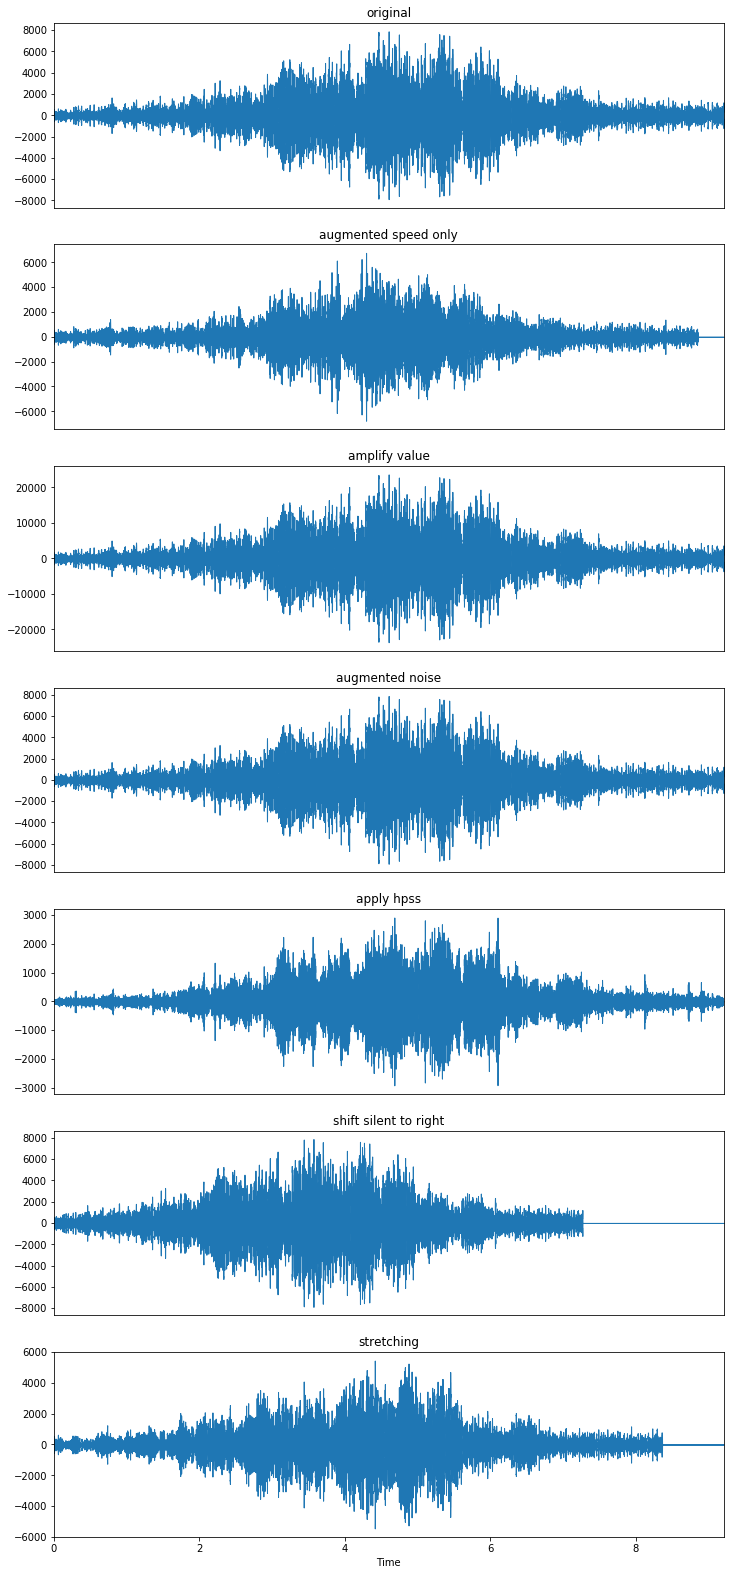

In [34]:
import librosa.display

plt.figure(figsize=(12, 4*9))
plt.subplot(9, 1, 1)
librosa.display.waveplot(samples.astype('float'), sr=sample_rate,x_axis=None)
plt.title('original')
plt.subplot(9, 1, 2)
librosa.display.waveplot(y_speed.astype('float'), sr=sample_rate,x_axis=None)
plt.title('augmented speed only')
plt.subplot(9, 1, 3)
librosa.display.waveplot(y_aug.astype('float'), sr=sample_rate,x_axis=None)
plt.title('amplify value')
plt.subplot(9, 1, 4)
librosa.display.waveplot(y_noise, sr=sample_rate,x_axis=None)
plt.title('augmented noise')
plt.subplot(9, 1, 5)
librosa.display.waveplot(y_hpss[1], sr=sample_rate,x_axis=None)
plt.title('apply hpss')
plt.subplot(9, 1, 6)
librosa.display.waveplot(np.array(shifted_silent).astype('float'), sr=sample_rate,x_axis=None)
plt.title('shift silent to right')
plt.subplot(9, 1, 7)
librosa.display.waveplot(streching, sr=sample_rate)
plt.title('stretching')
plt.show()